In [4]:
#212222240110
#Thiyagarajan A
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras import models
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
from tensorflow.compat.v1.keras.backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True # dynamically grow the memory used on the GPU
config.log_device_placement = True # to log device placement (on which device the operation ran)
sess = tf.compat.v1.Session(config=config)
set_session(sess)

Device mapping: no known devices.


In [2]:
pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
  Obtaining dependency information for matplotlib!=3.6.1,>=3.3 from https://files.pythonhosted.org/packages/49/74/544b327ca211fe2c484aa6fb3264d6cf8ee994594c86ab110cfd9cf0eb2b/matplotlib-3.8.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/58/56/e2c43dcfa1f9c7db4d5e3d6f5134b24ed953f4e2133a4b12f0062148db58/contourpy-1.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonho

In [7]:
my_data_dir = 'dataset/cell_images'

In [8]:
os.listdir(my_data_dir)

['test', 'train']

In [10]:
test_path = my_data_dir+'/test/'
train_path = my_data_dir+'/train/'

In [11]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [12]:
len(os.listdir(train_path+'/uninfected/'))

12479

In [13]:
os.listdir(train_path+'/parasitized')[0]

'C182P143NThinF_IMG_20151201_172257_cell_157.png'

In [14]:
para_img= imread(train_path+
                 '/parasitized/'+
                 os.listdir(train_path+'/parasitized')[0])

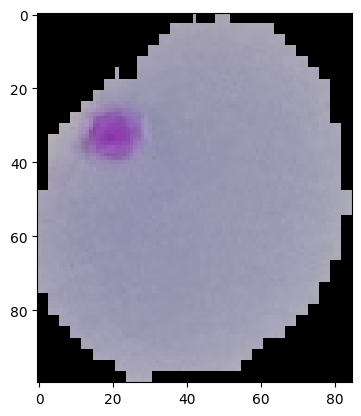

In [15]:
plt.imshow(para_img)

In [16]:
# Checking the image dimensions
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'/uninfected'):
    img = imread(test_path+'/uninfected'+'/'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

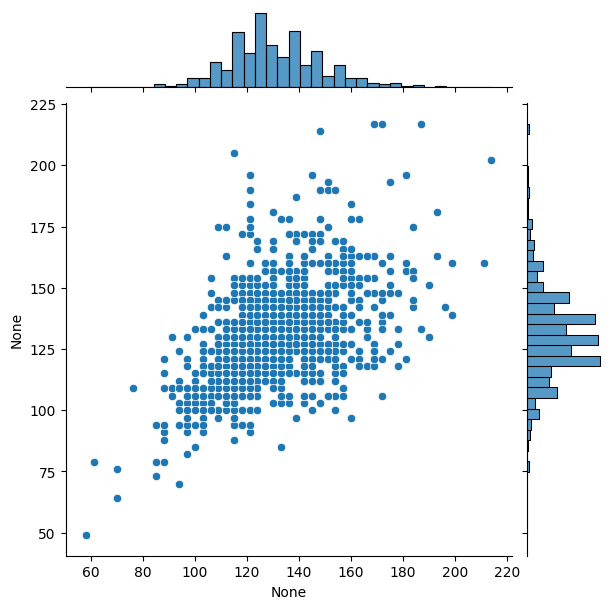

In [17]:
sns.jointplot(x=dim1,y=dim2)

In [20]:
image_shape = (130,130,3)

In [21]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [22]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [23]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [24]:
model = models.Sequential()
model.add(layers.Input(shape=(130,130,3))) 
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu'))
model.add(layers.AvgPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu')) 
model.add(layers.Dense(1, activation ='sigmoid'))
model.summary()
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 130, 130, 32)      896       
                                                                 
 average_pooling2d (Average  (None, 65, 65, 32)        0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 65, 65, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 32)                1

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 130, 130, 32)      896       
                                                                 
 average_pooling2d (Average  (None, 65, 65, 32)        0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 65, 65, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 32)                1

In [26]:
batch_size = 16

In [27]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [28]:
train_image_gen.batch_size

16

In [29]:
len(train_image_gen.classes)

24958

In [30]:
train_image_gen.total_batches_seen

0

In [31]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [32]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [33]:
results = model.fit(train_image_gen,epochs=15, validation_data=test_image_gen )

Epoch 1/15
1560/1560 [==============================] - 116s 74ms/step - loss: 0.4750 - accuracy: 0.7544 - val_loss: 0.2494 - val_accuracy: 0.9108
Epoch 2/15
1560/1560 [==============================] - 116s 74ms/step - loss: 0.2428 - accuracy: 0.9167 - val_loss: 0.2121 - val_accuracy: 0.9123
Epoch 3/15
1560/1560 [==============================] - 114s 73ms/step - loss: 0.2114 - accuracy: 0.9269 - val_loss: 0.2242 - val_accuracy: 0.9231
Epoch 4/15
1560/1560 [==============================] - 115s 74ms/step - loss: 0.1975 - accuracy: 0.9324 - val_loss: 0.1822 - val_accuracy: 0.9369
Epoch 5/15
1560/1560 [==============================] - 116s 74ms/step - loss: 0.1857 - accuracy: 0.9355 - val_loss: 0.1942 - val_accuracy: 0.9350
Epoch 6/15
1560/1560 [==============================] - 116s 74ms/step - loss: 0.1747 - accuracy: 0.9400 - val_loss: 0.1764 - val_accuracy: 0.9342
Epoch 7/15
1560/1560 [==============================] - 115s 73ms/step - loss: 0.1669 - accuracy: 0.9443 - val_loss: 0

In [34]:
losses = pd.DataFrame(model.history.history)

<Axes: >

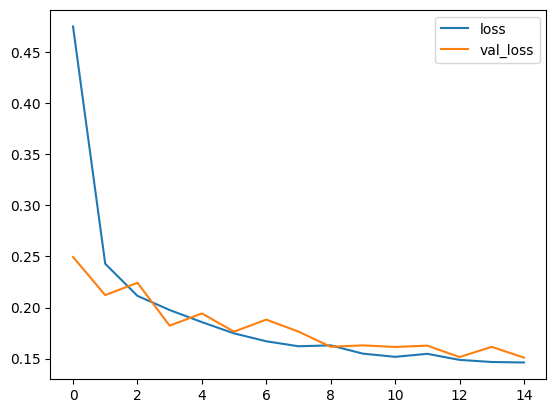

In [35]:
losses[['loss','val_loss']].plot()

In [36]:
model.metrics_names

['loss', 'accuracy']

In [37]:
model.evaluate(test_image_gen)

163/163 [==============================] - 10s 64ms/step - loss: 0.1491 - accuracy: 0.9485


[0.14905992150306702, 0.9484615325927734]

In [38]:
pred_probabilities = model.predict(test_image_gen)

163/163 [==============================] - 10s 60ms/step


In [39]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [40]:
predictions = pred_probabilities > 0.5

In [41]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1300
           1       0.94      0.96      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



In [42]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1221,   79],
       [  49, 1251]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 66ms/step
False
Cell is PARASITIZED


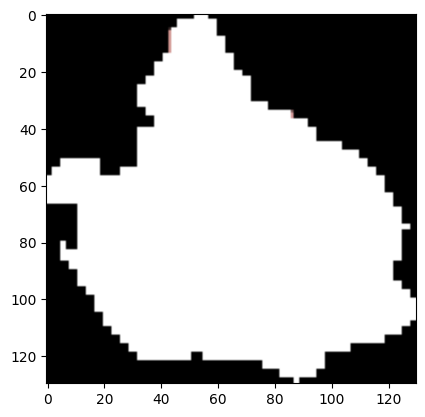

In [43]:
from tensorflow.keras.preprocessing import image
img = image.load_img('dataset/cell_images/test/parasitized/C100P61ThinF_IMG_20150918_144348_cell_144.png')
img=tf.convert_to_tensor(np.asarray(img))
img=tf.image.resize(img,(130,130))
img=img.numpy()
type(img)
plt.imshow(img)
x_single_prediction = bool(model.predict(img.reshape(1,130,130,3))>0.6)
print(x_single_prediction)
if(x_single_prediction==1):
    print("Cell is UNINFECTED")
else:
    print("Cell is PARASITIZED")